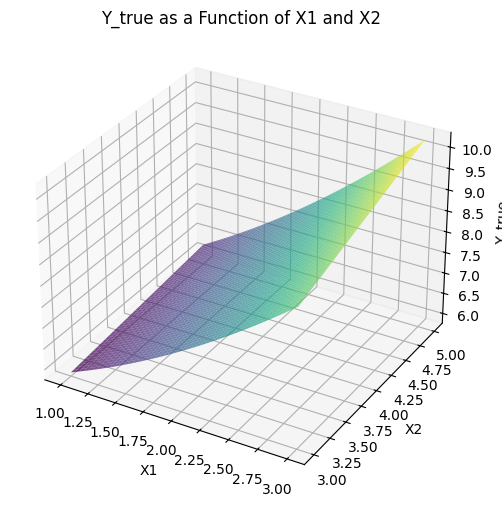

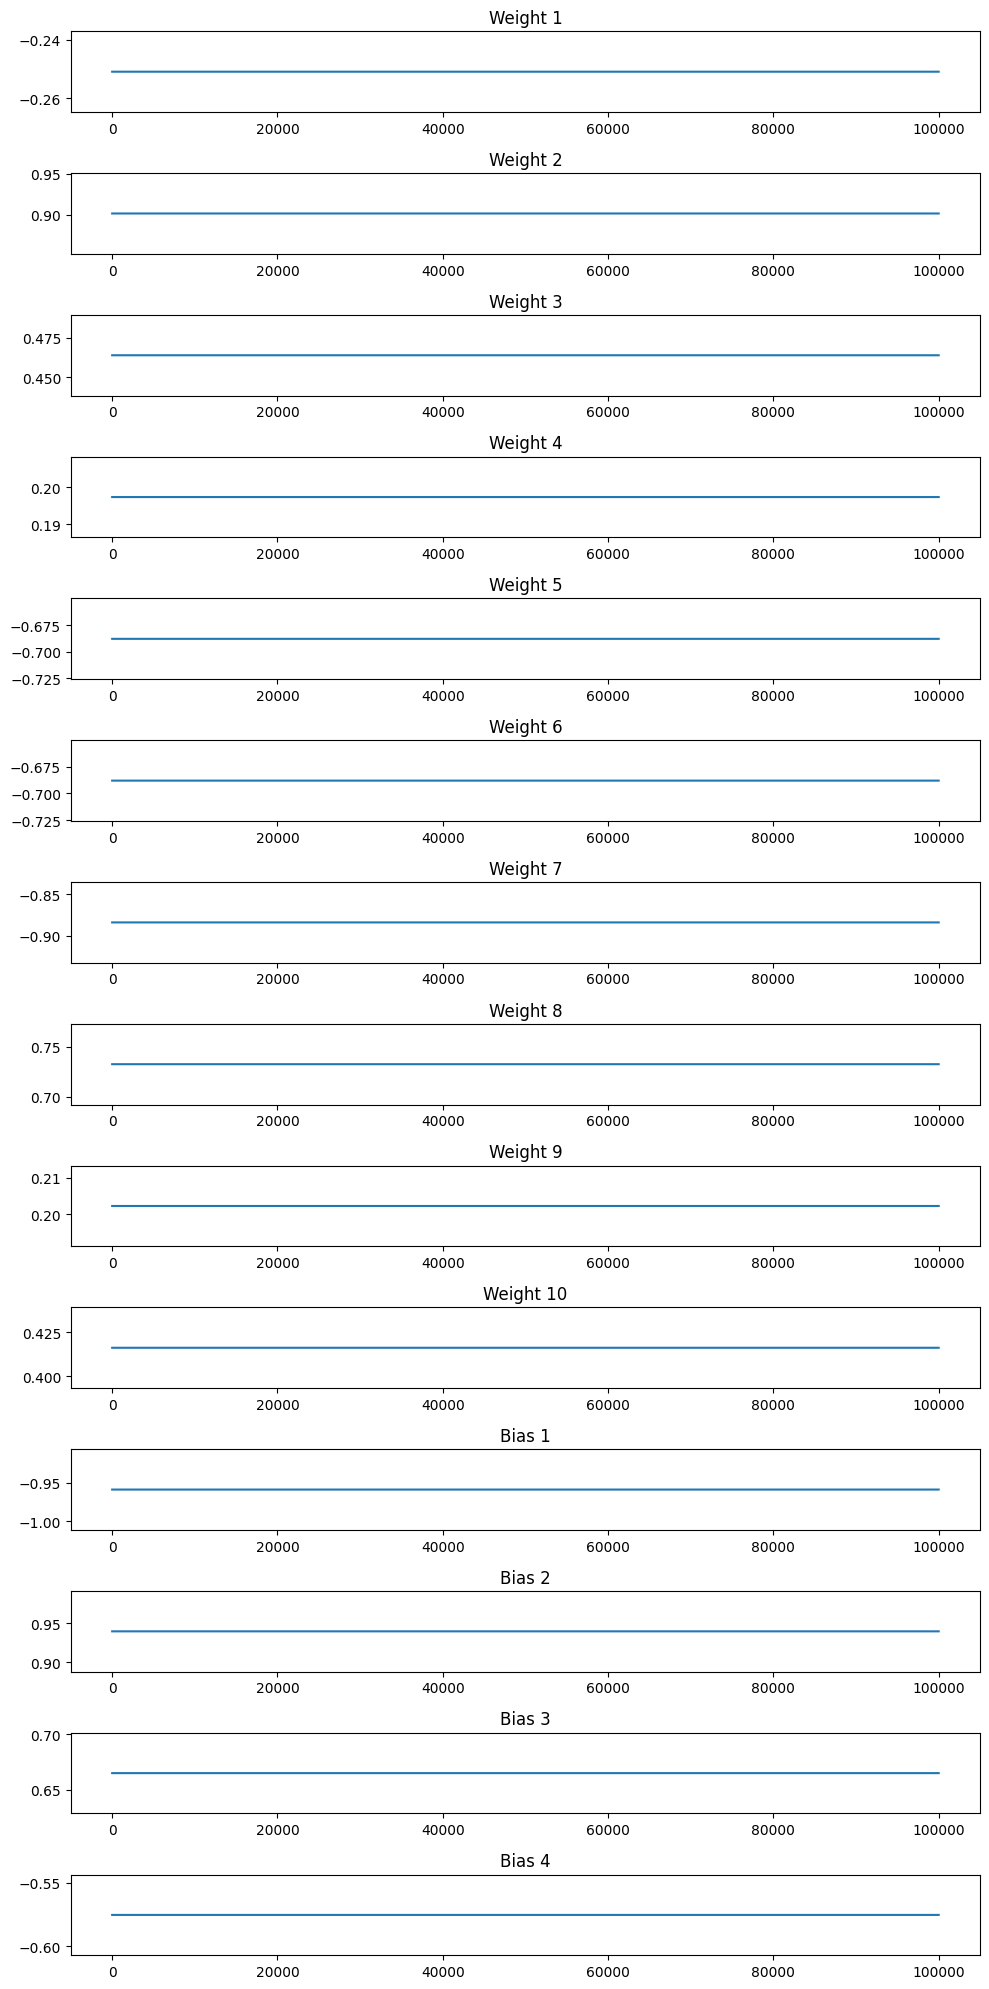

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Min-Max normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Initialize input data and true labels
X1 = np.array([1, 2, 3])
X2 = np.array([3, 4, 5])
# Generate Y_true using the specified function
def generate_y_true(X1, X2):
    return 0.25 * X1**2 + 0.2 * X1 * X2 + 5
Y_true = generate_y_true(X1, X2)
## Plot model of Y_true Generate data points for the 3D plot
X1_plot = np.linspace(np.min(X1), np.max(X1), 100)
X2_plot = np.linspace(np.min(X2), np.max(X2), 100)
X1_plot, X2_plot = np.meshgrid(X1_plot, X2_plot)
Y_true_plot = generate_y_true(X1_plot, X2_plot)

# Plotting Y_true as a function of X1 and X2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_true_plot, cmap='viridis', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_true')
ax.set_title('Y_true as a Function of X1 and X2')

plt.show()



# Normalize inputs and outputs
X1_normalized = normalize(X1)
X2_normalized = normalize(X2)
Y_true_normalized = normalize(Y_true)

# Initialize weights and biases
np.random.seed(42)
W11, W21, W12, W22 = 2 * np.random.rand(4) - 1
W31, W41, W32, W42 = 2 * np.random.rand(4) - 1
w51, w52 = 2 * np.random.rand(2) - 1
b1, b2, b3, b4 = 2 * np.random.rand(4) - 1

# Hyperparameters
learning_rate = 0.5
epochs = 100000

# Lists to store weights for visualization
weights = [W11, W21, W12, W22, W31, W41, W32, W42, w51, w52]
biases = [b1, b2, b3, b4]

# Lists to store weight and bias histories for visualization
weights_history = [[] for _ in range(len(weights))]
biases_history = [[] for _ in range(len(biases))]

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    A11 = sigmoid(X1_normalized * W11 + X2_normalized * W21 + b1)
    A12 = sigmoid(X1_normalized * W12 + X2_normalized * W22 + b2)
    A21 = sigmoid(A11 * W31 + A12 * W41 + b3)
    A22 = sigmoid(A11 * W32 + A12 * W42 + b4)
    Y_pred = A21 * w51 + A22 * w52

    # Calculate the loss
    loss = np.mean((Y_pred - Y_true_normalized)**2)

    # Backward pass
    d_loss = 2 * (Y_pred - Y_true_normalized) / len(Y_true_normalized)
    d_w51 = A21 * d_loss
    d_w52 = A22 * d_loss

    d_A21 = w51 * d_loss
    d_A22 = w52 * d_loss

    d_A11 = W31 * sigmoid_derivative(A11) * d_A21
    d_A12 = W41 * sigmoid_derivative(A12) * d_A21

    d_W11 = X1_normalized * sigmoid_derivative(A11) * d_A11
    d_W21 = X2_normalized * sigmoid_derivative(A11) * d_A11
    d_b1 = sigmoid_derivative(A11) * d_A11

    d_W12 = X1_normalized * sigmoid_derivative(A12) * d_A12
    d_W22 = X2_normalized * sigmoid_derivative(A12) * d_A12
    d_b2 = sigmoid_derivative(A12) * d_A12

    d_W31 = A11 * sigmoid_derivative(A21) * d_A21
    d_W41 = A12 * sigmoid_derivative(A21) * d_A21
    d_b3 = sigmoid_derivative(A21) * d_A21

    d_W32 = A11 * sigmoid_derivative(A22) * d_A22
    d_W42 = A12 * sigmoid_derivative(A22) * d_A22
    d_b4 = sigmoid_derivative(A22) * d_A22

    # Update weights and biases
    w51 -= learning_rate * np.mean(d_w51)
    w52 -= learning_rate * np.mean(d_w52)

    W11 -= learning_rate * np.mean(d_W11)
    W21 -= learning_rate * np.mean(d_W21)
    b1 -= learning_rate * np.mean(d_b1)

    W12 -= learning_rate * np.mean(d_W12)
    W22 -= learning_rate * np.mean(d_W22)
    b2 -= learning_rate * np.mean(d_b2)

    W31 -= learning_rate * np.mean(d_W31)
    W41 -= learning_rate * np.mean(d_W41)
    b3 -= learning_rate * np.mean(d_b3)

    W32 -= learning_rate * np.mean(d_W32)
    W42 -= learning_rate * np.mean(d_W42)
    b4 -= learning_rate * np.mean(d_b4)

    # Update the weights list
    weights = [W11, W21, W12, W22, W31, W41, W32, W42, w51, w52]

    # Append weights and biases for visualization
    for i, weight in enumerate(weights):
        weights_history[i].append(weight)

    for i, bias in enumerate(biases):
        biases_history[i].append(bias)

# Plotting the weights over iterations
fig, axes = plt.subplots(len(weights_history) + len(biases_history), 1, figsize=(10, 20))

for i, weight_history in enumerate(weights_history):
    axes[i].plot(weight_history)
    axes[i].set_title(f'Weight {i+1}')

for i, bias_history in enumerate(biases_history):
    axes[len(weights_history) + i].plot(bias_history)
    axes[len(weights_history) + i].set_title(f'Bias {i+1}')

plt.tight_layout()
plt.show()


In [5]:
weights

[0.3745401188473625,
 0.9507143064099162,
 0.7319939418114051,
 0.5986584841970366,
 0.15601864044243652,
 0.15599452033620265,
 0.05808361216819946,
 0.8661761457749352,
 0.6011150117432088,
 0.7080725777960455]

In [6]:
weight_history

[0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777960455,
 0.7080725777

In [7]:
Y_pred

array([0.46634236, 0.48332194, 0.49456558])

In [8]:
Y_true_normalized

array([0.      , 0.421875, 1.      ])